In [302]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf 
import matplotlib.pyplot as plt
from datetime import datetime

In [303]:

spy = pd.read_csv('/Users/Dishayshah/desktop/SPY 93-2024.csv')
spy['Date'] = pd.to_datetime(spy['Date'])
date = spy['Date']
spy

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.968750,43.968750,43.750000,43.937500,24.840685,1003200
1,1993-01-02,43.968750,44.250000,43.968750,44.250000,25.017347,480500
2,1993-02-02,44.218750,44.375000,44.125000,44.343750,25.070368,201300
3,1993-03-02,44.406250,44.843750,44.375000,44.812500,25.335379,529400
4,1993-04-02,44.968750,45.093750,44.468750,45.000000,25.441374,531500
...,...,...,...,...,...,...,...
7818,2024-02-16,501.700012,502.869995,498.750000,499.510010,499.510010,75461200
7819,2024-02-20,497.720001,498.410004,494.450012,496.760010,496.760010,71736700
7820,2024-02-21,495.420013,497.369995,493.559998,497.209991,497.209991,59603800
7821,2024-02-22,504.010010,508.489990,503.019989,507.500000,507.500000,76402500


In [304]:
spy.set_index('Date', inplace = True)

In [305]:
spy

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,24.840685,1003200
1993-01-02,43.968750,44.250000,43.968750,44.250000,25.017347,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.070368,201300
1993-03-02,44.406250,44.843750,44.375000,44.812500,25.335379,529400
1993-04-02,44.968750,45.093750,44.468750,45.000000,25.441374,531500
...,...,...,...,...,...,...
2024-02-16,501.700012,502.869995,498.750000,499.510010,499.510010,75461200
2024-02-20,497.720001,498.410004,494.450012,496.760010,496.760010,71736700
2024-02-21,495.420013,497.369995,493.559998,497.209991,497.209991,59603800


# Strategy 1

In [306]:
Adj_close = spy.iloc[:,[4]]


In [307]:
initial_value = 10000
shares_purchased = 10000/float(Adj_close.iloc[0])
ending_value = shares_purchased*float(Adj_close.iloc[-1])

Total_returns_strategy_1 = (ending_value-initial_value)/initial_value*100
Risk_strategy_1 = spy['Adj Close'].pct_change().std()*np.sqrt(252)


In [308]:
print('Initial Value taken =', initial_value)

print("Shares Purchased =", shares_purchased)

print('Total returns strategy 1 =',Total_returns_strategy_1)

print('Annual Risk of Strategy 1 =',Risk_strategy_1)

Initial Value taken = 10000
Shares Purchased = 402.5653881927974
Total returns strategy 1 = 1945.072468814769
Annual Risk of Strategy 1 = 0.18744173002015077


In [309]:
Strategy_1 = pd.DataFrame({
    'initial_value' : initial_value,
    'shares_purchased' : shares_purchased,
    'ending_value' : ending_value,
    'total_return' : Total_returns_strategy_1
},index=[1])

# Distribution of daily returns

/var/folders/h9/pjqxkmqd5zj_xnq0hhrrl07w0000gn/T/ipykernel_60173/2173393626.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  period1 = his_data.loc['1993':'2003']['Adj Close']
/var/folders/h9/pjqxkmqd5zj_xnq0hhrrl07w0000gn/T/ipykernel_60173/2173393626.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  period2 = his_data.loc['2004':'2013']['Adj Close']
/var/folders/h9/pjqxkmqd5zj_xnq0hhrrl07w0000gn/T/ipykernel_60173/2173393626.py:6: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  period3 = his_data.loc['2014':'2024']['Adj Close']


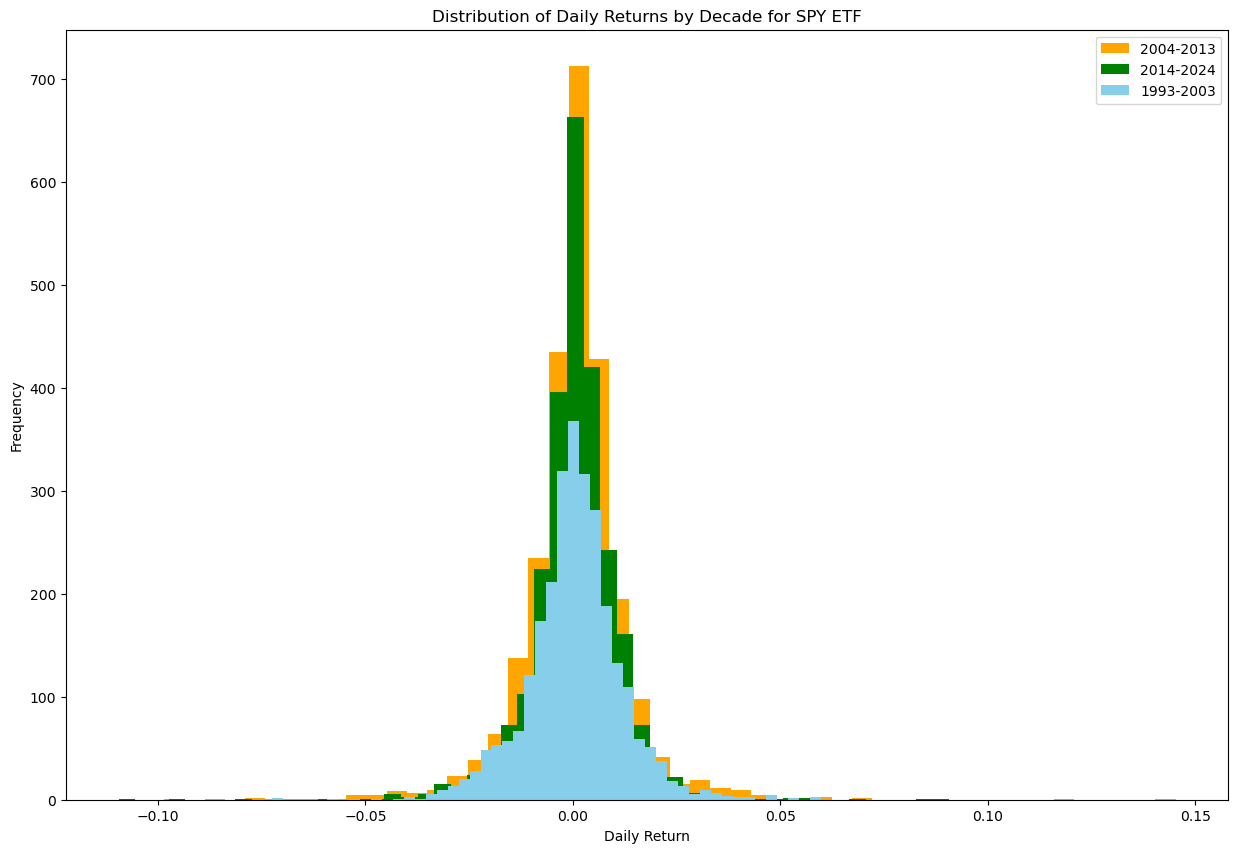

In [310]:

his_data = spy.pct_change().dropna()
his_data

period1 = his_data.loc['1993':'2003']['Adj Close']
period2 = his_data.loc['2004':'2013']['Adj Close']
period3 = his_data.loc['2014':'2024']['Adj Close']

plt.figure(figsize=(15, 10))
plt.hist(period2, bins=50, color='orange', alpha=1, label='2004-2013')
plt.hist(period3, bins=50, color='green', alpha=1, label='2014-2024')
plt.hist(period1, bins=50, color='skyblue', alpha=1, label='1993-2003')

plt.title('Distribution of Daily Returns by Decade for SPY ETF')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Kernel density of 10 year returns

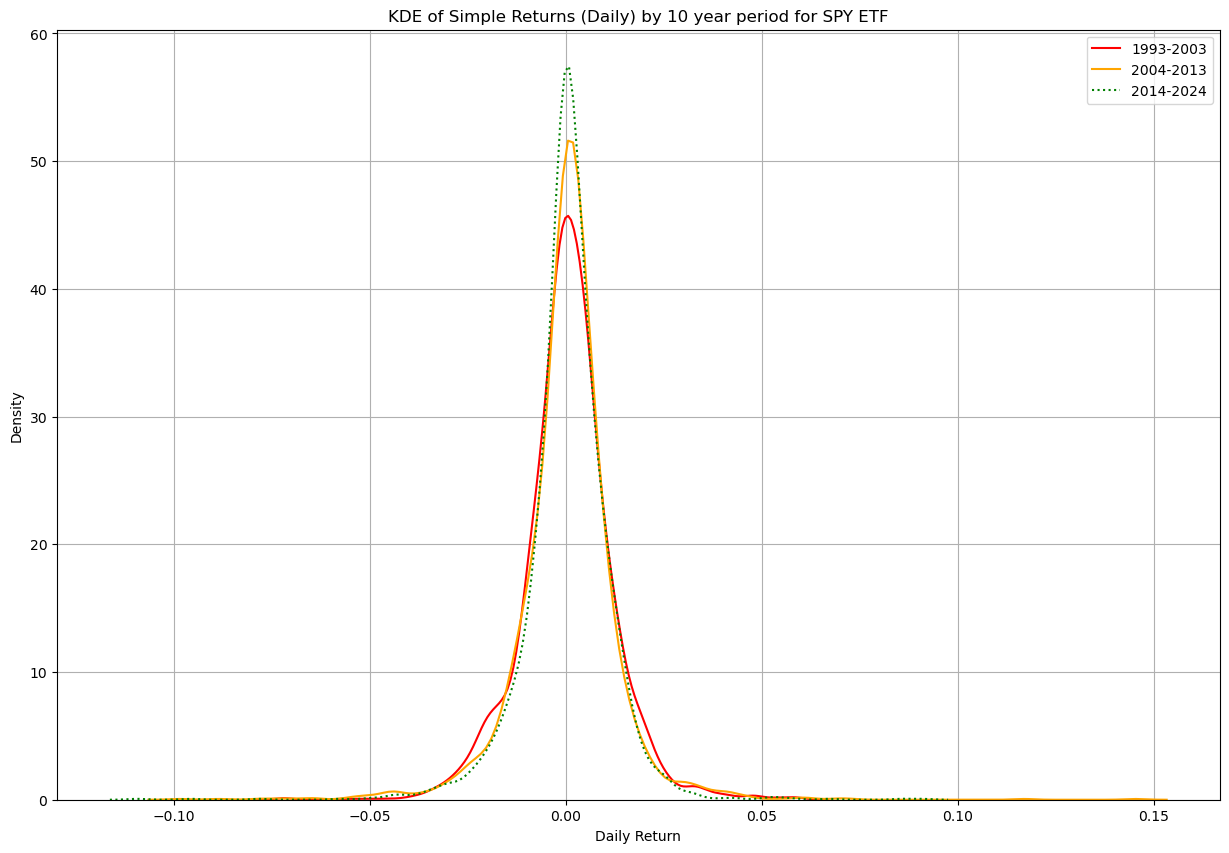

In [311]:
plt.figure(figsize=(15, 10))


sns.kdeplot(period1, color='red', label='1993-2003')
sns.kdeplot(period2, color='orange', label='2004-2013')
sns.kdeplot(period3, color='green', label='2014-2024', linestyle=":")


plt.title('KDE of Simple Returns (Daily) by 10 year period for SPY ETF')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()

plt.grid()
plt.show()

- In Strategy 1 we are holding the SPY shares from its inception and therefore we get all the gains from the share, in terms of capital gains and the dividend payments. This is the reason that this strategy provides the highest retruns among the 4. Due to this reason, this strategy also has the highest annual risk. 

# Strategy 2

In [370]:

Initial_investment = 10000
cash = Initial_investment

Investment = []
Profit_losses = []
Returns = []

for index,row in spy.iterrows():
    
    Number_of_shares = cash / row['Open']
    Investment_amount = cash
    Closing_value = Number_of_shares*row['Close']
    increase_decrease_in_capital = Closing_value
    Profit_loss = Closing_value - Investment_amount
    Return = Profit_loss/Investment_amount

    Investment.append(Investment_amount)
    Profit_losses.append(Profit_loss)
    Returns.append(Return)

    cash = increase_decrease_in_capital
    
Strategy_2 = pd.DataFrame({
    'Investment Amount': Investment,
    'Profit/Loss': Profit_losses,
    'Return': Returns
})


In [313]:
print('Initial Value =',float(Strategy_2.iloc[0,[0]]))

Initial Value = 10000.0


In [314]:
print('Final Value =', float(Strategy_2.iloc[-1,[0]]))

Final Value = 11866.391069041256


In [315]:
strategy_2 = Strategy_2.set_index(date)

In [316]:
Total_returns_strategy_2 = ((float(Strategy_2.iloc[-1,[0]]))-(float(Strategy_2.iloc[0,[0]])))/(float(Strategy_2.iloc[0,[0]]))

In [317]:
print('Total returns of Strategy 2 =',Total_returns_strategy_2)

Total returns of Strategy 2 = 0.18663910690412558


In [318]:
std_dev2 = Strategy_2['Return'].std()

In [319]:
Risk_strategy_2 =std_dev2*np.sqrt(252)
print('Annual Risk of Strategy 2 =',Risk_strategy_2)

Annual Risk of Strategy 2 = 0.15319427021344442


# Change in Investment value over the time period

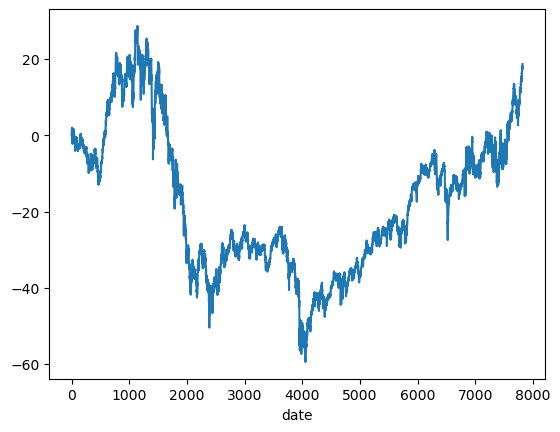

In [320]:
(
Strategy_2
    ['Investment Amount']
    .pct_change()
    .add(1)
    .cumprod()
    .sub(1)
    .mul(100)
    .plot()
)
plt.xlabel('date')
plt.show()

# Change in Investment value over the time period

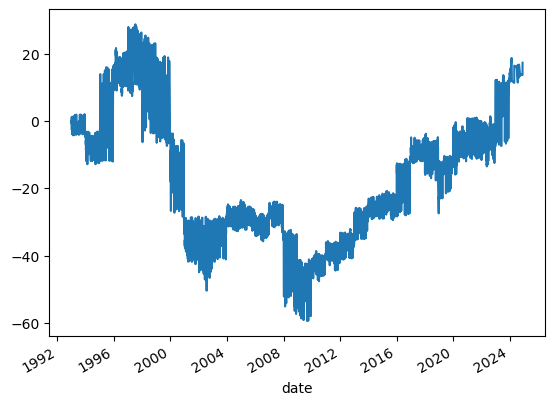

In [321]:
(
strategy_2
    ['Investment Amount']
    .pct_change()
    .add(1)
    .cumprod()
    .sub(1)
    .mul(100)
    .plot()
)
plt.xlabel('date')
plt.show()

 - In Strategy 2 we are buying at the open price and selling at the close price of the spy, which means we can never be eligible for the payment of a dividend as you need to hold a stock for at least 2 days prior to the record date and we disobey that rule as we never really own the ETF as we always sell it at the close price. 

# Strategy3

In [322]:
spy1 = spy.iloc[:,[0,3]]
spy1

,Open,Close
Date,,
1993-01-29,43.968750,43.937500
1993-01-02,43.968750,44.250000
1993-02-02,44.218750,44.343750
1993-03-02,44.406250,44.812500
1993-04-02,44.968750,45.000000
...,...,...
2024-02-16,501.700012,499.510010
2024-02-20,497.720001,496.760010
2024-02-21,495.420013,497.209991


In [323]:
initial_investment = 10000
current_balance = initial_investment

Invested=[]
Gains = []
Returns = []
for i in range(len(spy1)-1):
    shares_bought = current_balance/spy1['Close'][i]
    investment = current_balance
    amount_spent = shares_bought * spy1['Close'][i]
    amount_received = shares_bought*spy1['Open'][i+1]
    change_in_capital = amount_received
    gains_losses = amount_received - investment
    returns = gains_losses/investment
    
    Invested.append(investment)
    Gains.append(gains_losses)
    Returns.append(returns)
    
    current_balance = change_in_capital
    
Strategy_3 = pd.DataFrame({
    'Investment Amount': Invested,
    'Profit/Loss': Gains,
    'Return': Returns
})
    

Strategy_3

,Investment Amount,Profit/Loss,Return
0,10000.000000,7.112376,0.000711
1,10007.112376,-7.067170,-0.000706
2,10000.045206,14.094496,0.001409
3,10014.139702,34.916805,0.003487
4,10049.056507,-6.978511,-0.000694
...,...,...,...
7817,96621.639915,-59.665175,-0.000618
7818,96561.974740,-346.032713,-0.003584
7819,96215.942027,-259.539961,-0.002697
7820,95956.402066,1312.333559,0.013676


In [324]:
print('Initial Value =',float(Strategy_2.iloc[0,[0]]))
print('Final Value =',float(Strategy_3.iloc[-1,[0]]))
print('Total Returns of Strategy 3 =',Total_returns_strategy_3)
print('Annual Risk of Strategy 3 =',Risk_strategy_3)

Initial Value = 10000.0
Final Value = 97268.73562533264
Total Returns of Strategy 3 = 8.726873562533264
Annual Risk of Strategy 3 = 0.10642743367291121


In [325]:
Strategy_3= Strategy_3.set_index(date[1:])

In [326]:
Total_returns_strategy_3 = (float(Strategy_3.iloc[-1,[0]])-float(Strategy_3.iloc[0,[0]]))/(float(Strategy_3.iloc[0,[0]]))


In [327]:
Risk_strategy_3 = Strategy_3['Return'].std()*np.sqrt(252)

# Change in Investment value over the time period

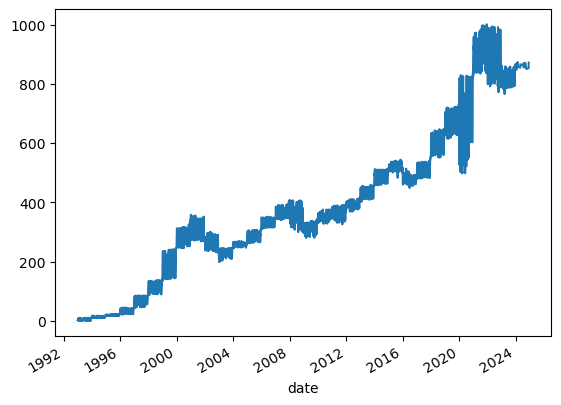

In [328]:
(
Strategy_3
    ['Investment Amount']
    .pct_change()
    .add(1)
    .cumprod()
    .sub(1)
    .mul(100)
    .plot(linestyle='-')
)
plt.xlabel('date')
plt.show()

- If we see the SPY’s prices in the form of candlesticks, we would see that sometimes the stocks open price on a day is way higher than the previous days closing price, which I call a gap-up opening. So if we buy the SPY at the close price and sell it at the open price we would miss out on the gains. Therefore in strategy 2 we miss out on these gap up gains. We capture these gains in strategy 3 but we forgo the gains that occur during the day.


# strategy 4

In [329]:
spy

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,24.840685,1003200
1993-01-02,43.968750,44.250000,43.968750,44.250000,25.017347,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.070368,201300
1993-03-02,44.406250,44.843750,44.375000,44.812500,25.335379,529400
1993-04-02,44.968750,45.093750,44.468750,45.000000,25.441374,531500
...,...,...,...,...,...,...
2024-02-16,501.700012,502.869995,498.750000,499.510010,499.510010,75461200
2024-02-20,497.720001,498.410004,494.450012,496.760010,496.760010,71736700
2024-02-21,495.420013,497.369995,493.559998,497.209991,497.209991,59603800


In [330]:
daily_rets = spy['Adj Close'].pct_change()
daily_rets1 = spy['Adj Close'].pct_change()
daily_rets2 = spy['Adj Close'].pct_change()


In [331]:
daily_rets_min_1 = daily_rets1.sort_values(ascending=True)


daily_rets_max_1 = daily_rets1.sort_values(ascending = False)


max_1_ret = daily_rets_max_1[0]
min_1_ret = daily_rets_min_1[0]

daily_rets1['13/10/08'] = 0
daily_rets1['16/03/20'] = 0

cum_ret1 = daily_rets1.add(1).cumprod().sub(1).mul(100)


In [332]:
daily_rets_min_2 = daily_rets2.sort_values(ascending=True)


daily_rets_max_2 = daily_rets2.sort_values(ascending = False)


max_2_ret = daily_rets_max_2[0:2]
min_2_ret = daily_rets_min_2[0:2]

daily_rets2['13/10/08'] = 0
daily_rets2['16/03/20'] = 0
daily_rets2['28/10/08'] = 0
daily_rets2['15/10/08'] = 0

cum_ret2 = daily_rets2.add(1).cumprod().sub(1).mul(100)


In [333]:
daily_rets_min_3 = daily_rets.sort_values(ascending=True)


In [334]:
daily_rets_max_3 = daily_rets.sort_values(ascending = False)


In [361]:
max_3_values = daily_rets_max_3.iloc[:3]


In [362]:
min_3_values = daily_rets_min_3.iloc[:3]


In [344]:
daily_rets['16/03/20'] = 0
daily_rets['15/10/08'] = 0
daily_rets['12/03/20'] = 0
daily_rets['13/10/08'] = 0
daily_rets['28/10/08'] = 0
daily_rets['24/03/20'] = 0

In [360]:
cum_ret = daily_rets.add(1).cumprod().sub(1).mul(100)


In [365]:
Total_returns_strategy_4_n_3 = cum_ret[-1]
Total_returns_strategy_4_n_2 = cum_ret2[-1]
Total_returns_strategy_4_n_1 = cum_ret1[-1]


In [366]:
print('Total returns of Strategy 4  where n is 1 =',Total_returns_strategy_4_n_1)

print('Total returns strategy 4 where n is 2 =',Total_returns_strategy_4_n_2)

print('Total returns of Strategy 4 where n is 3 =',Total_returns_strategy_4_n_3)

print('Annual Risk of Strategy 4 where n is 1=',Risk_strategy_4_n_1)

print('Annual Risk of Strategy 4 where n is 2=',Risk_strategy_4_n_2)

print('Annual Risk of Strategy 4 where n is 3=',Risk_strategy_4_n_3)

Total returns of Strategy 4  where n is 1 = 1905.198978988837
Total returns strategy 4 where n is 2 = 1891.4500630346133
Total returns of Strategy 4 where n is 3 = 1919.1993090113378
Annual Risk of Strategy 4 where n is 1= 0.1825339007728034
Annual Risk of Strategy 4 where n is 2= 0.1845815822636617
Annual Risk of Strategy 4 where n is 3= 0.18099453993320716


In [348]:
Risk_strategy_4_n_3 = daily_rets.std()*np.sqrt(252)
Risk_strategy_4_n_2 = daily_rets1.std()*np.sqrt(252)
Risk_strategy_4_n_1 = daily_rets2.std()*np.sqrt(252)

# Change in Investment value over the time period

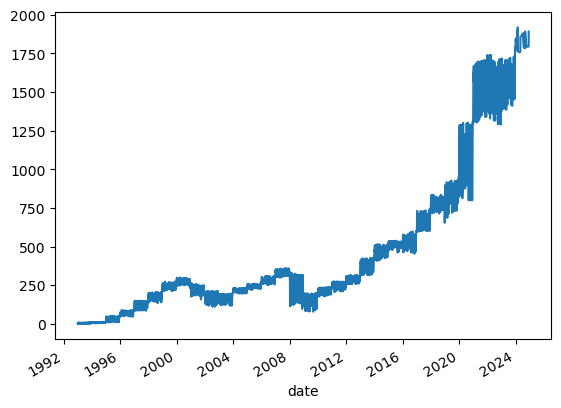

In [367]:
(
    daily_rets
    .add(1)
    .cumprod()
    .sub(1)
    .mul(100)
    .plot()
)
plt.xlabel('date')
plt.show()

- This strategy is similar to the first strategy, the only change is that we are eliminating the highest 3 returns and the lowest 3 returns. This results in us having a slightly lesser risk and return than the first strategy, which has the highest risk and return. Overall this strategy has performed better than the 2nd and 3rd strategy. By eliminating the extreme values we smoothen the data. 

In [358]:
df = pd.DataFrame({
    'index':['Strategy_1','Strategy_2','Strategy_3','Strategy_4_n_3','Strategy_4_n_2','Strategy_4_n_1'],
    'Total_returns':[Total_returns_strategy_1,Total_returns_strategy_2,Total_returns_strategy_3,Total_returns_strategy_4_n_3,Total_returns_strategy_4_n_2,Total_returns_strategy_4_n_1],
    'Annual Risk' : [Risk_strategy_1,Risk_strategy_2,Risk_strategy_3,Risk_strategy_4_n_3,Risk_strategy_4_n_2,Risk_strategy_4_n_1]
})


,index,Total_returns,Annual Risk
0,Strategy_1,1945.072469,0.187442
1,Strategy_2,0.186639,0.153194
2,Strategy_3,8.726874,0.106427
3,Strategy_4_n_3,1919.199309,0.180995
4,Strategy_4_n_2,1891.450063,0.184582
5,Strategy_4_n_1,1905.198979,0.182534


# Summary of risk and return of all strategies

In [359]:
print(df)

            index  Total_returns  Annual Risk
0      Strategy_1    1945.072469     0.187442
1      Strategy_2       0.186639     0.153194
2      Strategy_3       8.726874     0.106427
3  Strategy_4_n_3    1919.199309     0.180995
4  Strategy_4_n_2    1891.450063     0.184582
5  Strategy_4_n_1    1905.198979     0.182534


# Interpretation

- According to our Analysis, strategy 1 gives the best returns as you are holding the spy throughout without any breaks in between, so we benefit from the dividends as well as the capital gains.
- Strategy 2 gives the lowest returns with the lowest risk, as in this strategy we do not benefit from dividends. We also miss out on the gains from gap up opening in the next day. 
- Strategy 3 allows us to capture the gains from gap up openings and this strategy is better than strategy 2 whereby it provides better returns at a lower risk. 
- A risk averse investor can consider strategy 4 and its different elements. Eliminating the best 3 and worst 3 returns provides the highest returns at a lower risk than eliminating either the best/worst 2 returns or best/worst 1 return 

# Limitations

- The real world limitations of executing these strategies are that no one can perfectly buy and sell exactly at the close and open prices, as we have done in strategy 2 and 3. As no one can predict the exact close and open prices. In the real world we will have to bear transaction costs in terms of brokerage and taxes while executing these strategies and these costs can significantly eat into your returns. 

#